In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dataset loaded and preprocessed successfully!
Displaying sample images...


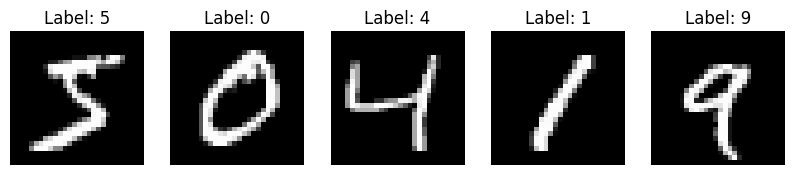

In [4]:
# Preprocess and Explore Your Dataset
# Download the MNIST dataset [cite: 20]
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the images [cite: 21]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding format
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Dataset loaded and preprocessed successfully!")

# Visualize a few sample images from the dataset [cite: 21]
print("Displaying sample images...")
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
# Build Your First CNN Model
# Implement a basic convolutional neural network using TensorFlow/Keras
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Dropout to prevent overfitting
    Dense(10, activation='softmax') # Output layer for 10 digits (0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("CNN Model built successfully!")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model built successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Enhance with Data Augmentation
# Apply image augmentation techniques (rotation, flipping)
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)
print("Data Augmentation is set up.")

Data Augmentation is set up.


In [7]:
# Train the model on your dataset and monitor metrics [cite: 23, 25]
print("Starting model training...")
# For the deadline, we are training for only 5 epochs. For better results, you can increase this later.
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=5,
                    validation_data=(x_test, y_test_cat),
                    verbose=1)

print("Model training complete!")

Starting model training...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.7278 - loss: 0.8221 - val_accuracy: 0.9793 - val_loss: 0.0619
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9326 - loss: 0.2238 - val_accuracy: 0.9884 - val_loss: 0.0356
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9530 - loss: 0.1564 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9615 - loss: 0.1291 - val_accuracy: 0.9919 - val_loss: 0.0247
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9676 - loss: 0.1098 - val_accuracy: 0.9920 - val_loss: 0.0239
Model training complete!


Evaluating model performance...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



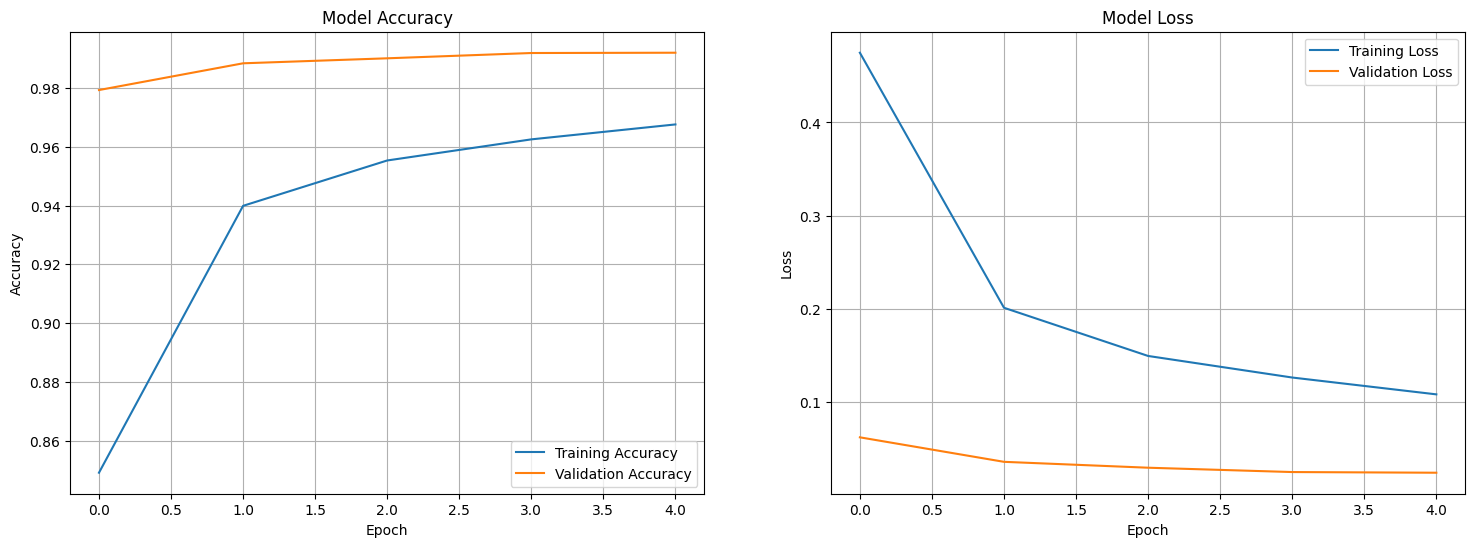

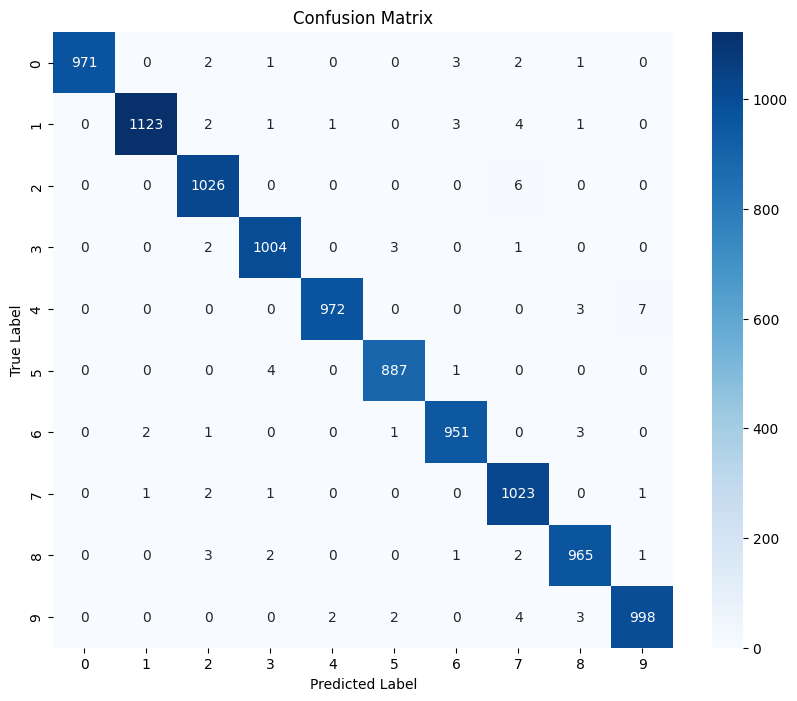

In [8]:
# Evaluate your model using metrics
print("Evaluating model performance...")

# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print metrics like accuracy, precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize your results using Matplotlib [cite: 26]
# 1. Plot accuracy/loss curves
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.savefig('training_curves.png')
plt.show()

# 2. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()

# After this cell runs, download training_curves.png and confusion_matrix.png from the Colab files panel.

In [9]:
# Prepare Data for Transfer Learning
import tensorflow as tf

# We need to convert the 1-channel (grayscale) MNIST images to 3-channel (like RGB)
# because MobileNetV2 was trained on color images.
# We will also resize them from 28x28 to a larger size, e.g., 96x96.

# Prepare training data
x_train_resized = tf.image.resize(x_train, [96, 96]) # Resize images
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized) # Convert to 3 channels

# Prepare test data
x_test_resized = tf.image.resize(x_test, [96, 96]) # Resize images
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized) # Convert to 3 channels

print("Data successfully resized and converted for MobileNetV2.")
print("New training data shape:", x_train_rgb.shape)
print("New test data shape:", x_test_rgb.shape)

Data successfully resized and converted for MobileNetV2.
New training data shape: (60000, 96, 96, 3)
New test data shape: (10000, 96, 96, 3)


In [10]:
# Load the pre-trained MobileNetV2 model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# Load MobileNetV2 without its final classification layer (include_top=False)
base_model = MobileNetV2(input_shape=(96, 96, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the layers of the base model so they are not trained again
base_model.trainable = False

print("MobileNetV2 base model loaded and its layers are frozen.")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MobileNetV2 base model loaded and its layers are frozen.


In [11]:
# Add our own classification layers on top of the base model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Get the output of the base model
x = base_model.output

# Add our new layers
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x) # Final layer for 10 digits

# Combine the base model and our new layers into one single model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

print("New classification head added to the model.")
transfer_model.summary()

New classification head added to the model.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
# Compile and train the new transfer learning model
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

print("\nStarting training for the transfer learning model...")
# We will train for just 3 epochs to save time
history_transfer = transfer_model.fit(x_train_rgb, y_train_cat,
                                      epochs=3,
                                      batch_size=64,
                                      validation_data=(x_test_rgb, y_test_cat))

print("Training of the transfer learning model is complete!")


Starting training for the transfer learning model...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8545 - loss: 0.4602 - val_accuracy: 0.9646 - val_loss: 0.1024
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9521 - loss: 0.1516 - val_accuracy: 0.9717 - val_loss: 0.0839
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9609 - loss: 0.1224 - val_accuracy: 0.9699 - val_loss: 0.0913
Training of the transfer learning model is complete!


In [14]:
# Evaluate the performance of the new model
loss, accuracy = transfer_model.evaluate(x_test_rgb, y_test_cat, verbose=0)

print("\n--- Transfer Learning Model Performance ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nNow you can compare this accuracy with your first custom CNN model's accuracy.")


--- Transfer Learning Model Performance ---
Accuracy: 96.99%

Now you can compare this accuracy with your first custom CNN model's accuracy.
